In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv('kc_house_price.txt')

In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.drop(columns = ['id'], inplace = True)

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df.drop(df[df['view'].isnull()].index, inplace = True)

In [7]:
df.drop(df[df['waterfront'].isnull()].index, inplace = True)

In [8]:
df.drop(df[df['yr_renovated'].isnull()].index, inplace = True)
df.drop(columns =['date'], inplace = True)
df.drop(df[df['sqft_basement'] == "?"].index, inplace = True)

In [9]:
df = df.astype({'sqft_basement' : float})

In [10]:
X = df.drop(columns = 'price')

In [11]:
y = df.price.values.reshape(df.shape[0],1)
y

array([[538000.],
       [604000.],
       [510000.],
       ...,
       [400000.],
       [402101.],
       [325000.]])

In [12]:
# scale the matrix
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(X)
scaled_y = sy.fit_transform(y)

In [13]:
scaled_y

array([[0.05985823],
       [0.06852192],
       [0.05618273],
       ...,
       [0.04174324],
       [0.04201903],
       [0.03189814]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, 
                                                    test_size = 0.3, random_state= 100, shuffle= True)

In [19]:
def min_batch(X, y, epochs = 1000, learning_rate = 0.001):
    W = np.ones(shape = X.shape[1])
    b = 1
    total_sample = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_hat = np.dot(W, X.T) + b 
        w_grad = -(2/total_sample) * (X.T.dot(y-y_hat))
        b_grad = -(2/total_sample) * np.sum(y-y_hat)
        
        W = W - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y-y_hat))
        if (i%100 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
    return W, b, cost , cost_list, epoch_list

In [20]:
w, b, cost , cost_list, epoch_list = min_batch(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)

In [21]:
w,b

(array([ 0.80832947,  0.28203242,  0.4884856 ,  0.94565808,  0.20136205,
         0.75730405,  0.20273954,  0.12201003, -0.1102524 ,  0.42439633,
         0.68191131, -0.11441221,  0.3656247 ,  0.26506276, -0.02312538,
         0.49465159,  0.16678529,  0.92528894]),
 -0.5443784402935712)

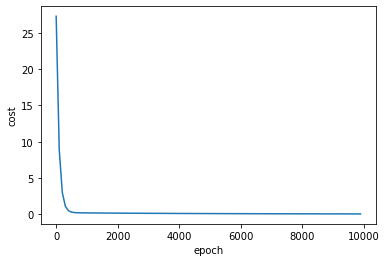

In [22]:
from matplotlib import pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [28]:
def mse(w, b, x, y_true):
    y_hat = np.dot(w, x.T) + b
    mse = np.mean(np.square(y_true.reshape((y_test.shape[0],)) - y_hat))
    return mse

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
reg = lr.fit(X_train,y_train)

In [31]:
reg.coef_

array([[-1.57987861e-01,  4.26936893e-02,  2.29320210e+10,
         2.60808874e-02,  9.16039649e-04,  8.52604586e-02,
         2.99317762e-02,  1.36788045e-02,  1.19749992e-01,
        -1.57407342e+10, -8.39273660e+09, -4.10213056e-02,
         6.78587904e-03, -1.66851513e-02,  4.97045364e-02,
        -3.61440771e-02,  5.99964588e-03, -4.64361262e-02]])

In [32]:
reg.intercept_

array([-0.04131461])

In [33]:
mse(w, b, X_test, y_test)

0.04341634386653782

In [41]:
def predict(w,b,x):
    return np.dot(w,x.T) +b

In [47]:
X_test[0].shape

(18,)

In [48]:
y_test[3]

array([0.11262799])

In [50]:
predict(w,b,X_test[3])

-0.06016612499593904

In [46]:
w.shape

(18,)